<center> <h2>The University of British Columbia</h2> </center>
<center> <h2>Earth and Ocean Sciences 354</h2> </center>
<center> <h3>Geophysical Time Series Analysis</h3> </center>
<center> <h3>Problem Set # 3</h3> </center>

*Due: September 28, 2020*

1. Write a Python function that will allow you to convolve two signals *a*, *b* using formula (2.7) in the notes, that is
$$ c_p = \sum_{k=0}^{p}a_{k}b_{p-k} $$
Your function should have the following form:
```python
def convolve(a, b):
#
# Put comments here.
#
        N = len(a)
        M = len(b)
        c = np.zeros(N+M-1)
    
        function body (for loops)
    
        return c
```

Use the Python online documentation with "for", "function", "zeros" for more details. Note that Python indices begin with 0 and that you are assuming that the functions *a* and *b* are zero outside the domain of definition. Once you have written your function you can try it out by convolving each of the functions from the previous Lab (#2) with the time series **b** defined as follows (i.e. copy this text to generate your own spike train **b**:
```python
b = [0]*2048
ib = [50, 150, 250, 1250]
nb = [-1, -2, 0.5, -1]
for i in range(4): ###fix
    b[ib[i]] = nb[i]
```

Please provide a plot showing what the spike train **b** looks like. For each of the functions **a** outlined below (from Lab #2), convolve with **b** and provide a plot illustrating the solution. Comment on the character of the results. How do each **a** and **b** appear and affect the resulting convolution **c**. Also demonstrate the commutativity property of the convolution, $$a * b = b * a$$
This could be demonstrated either by providing a new series of plots, or you can overplot $b * a$ over top of the $a * b$ curves and plot with a different `marker`, such as `o` or `x`. For example:
```python
# Compute the two convolutions
c1 = convolve(a, b)
c2 = convolve(b, a)

# Plot
plt.plot(c1)
plt.plot(c2, marker='o')
plt.show()
```
Please provide a copy of the *mfiles* you created in order to complete the question (likely there are two, the convolution function *mfile* and the *mfile* used to convolve the different **a** with **b**. Make sure that they are commented and organized. Also provide a copy of your plot output.  
a) `a = np.random.rand(len(t))`  
b) `a = np.exp(-np.maximum(np.abs(t),500)/100)*50`  
c) `a = 10*np.exp(-((t-500)/50)**2)`  
d) `a = np.exp(-np.abs(t-500)/100)*np.cos(2*np.pi*t/100)`  
e) `a = np.exp(-np.abs(t)/100)*np.sqrt(np.sin(2*np.pi*t/40)+1)`

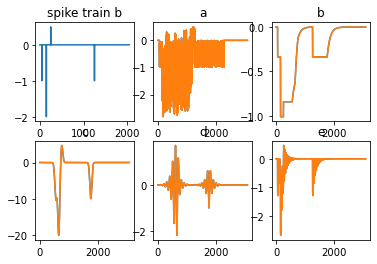

In [2]:
import matplotlib.pyplot as plt
import numpy as np


#Convolution function
def convolve(a, b):
    N = len(a)
    M = len(b)

    c = np.zeros(N+M-1)

    for i in range(N): #looping through every index in a
        for j in range(M): #looping through every index in b
            c[i+j] += a[i]*b[j] #adding the product of a[i] and b[j] to the corresponding element of c

    return c


#Spike Train b
spikeTrain = [0]*2048
ib = [50, 150, 250, 1250]
nb = [-1, -2, 0.5, -1]

for i in range(4):
    spikeTrain[ib[i]] = nb[i]


#Functions from Lab #2 convolved with the spike train
t = np.arange(0, 1024, 1)

a = np.random.random(1024)
aConv = convolve(a, spikeTrain)
aConvRev = convolve(spikeTrain, a) #convolved in the opposite direction to demonstrate commutativity

def b(t):
    return np.exp(-np.maximum(abs(t),500)/100)*50
bConv = convolve(b(t), spikeTrain)
bConvRev = convolve(spikeTrain, b(t))

def c(t):
    return 10*np.exp(-((t-500)/50)**2)
cConv = convolve(c(t), spikeTrain)
cConvRev = convolve(spikeTrain, c(t))

def d(t):
    return np.exp(-abs(t-500)/100)*np.cos(2*np.pi*t/100)
dConv = convolve(d(t), spikeTrain)
dConvRev = convolve(spikeTrain, d(t))

def e(t):
    return np.exp(-abs(t)/100)*np.sqrt(np.sin(2*np.pi*t/40)+1)
eConv = convolve(e(t), spikeTrain)
eConvRev = convolve(spikeTrain, e(t))


#Plots of the functions from Lab #2 convolved with the spike train (in both directions to show commutativity)

fig, plots = plt.subplots(2, 3)

plots[0, 0].plot(spikeTrain)
plots[0, 0].set_title('spike train b')
plots[0, 1].plot(aConv)
plots[0, 1].plot(aConvRev)
plots[0, 1].set_title('a')
plots[0, 2].plot(bConv)
plots[0, 2].plot(bConvRev)
plots[0, 2].set_title('b')
plots[1, 0].plot(cConv)
plots[1, 0].plot(cConvRev)
plots[1, 0].set_title('c')
plots[1, 1].plot(dConv)
plots[1, 1].plot(dConvRev)
plots[1, 1].set_title('d')
plots[1, 2].plot(eConv)
plots[1, 2].plot(eConvRev)
plots[1, 2].set_title('e')

plt.show()

#Looking at the plots, there are clearly elements from both the spike train and the original plot.
#In general, the convoluted plots look like the plots from Lab #2, but they are flipped over the
#x-axis at the indeces where the spike train is negative, and the plots are scaled by the values
#in the spike train as well.

2. Consider the following periodic, box-car function
$$ a(t) =   \left\{
\begin{array}{ll}
      1 & 0 < t < \frac{1}{4} \\
      0 & \frac{1}{4} < t < \frac{3}{4} \\
      1 & \frac{3}{4} < t < 1 \\
\end{array} 
\right.  $$
a) Determine the Fourier coefficients $a_0, c_n, s_n$ using the formulae provided in class. Note that the period $T=1$. Comment on your results.  
b) Using Python, program your expressions in a) and plot the truncated series using ${n=1,2,4,16,128,2048}$ terms. Comment on your results again and include a copy of your program and output.

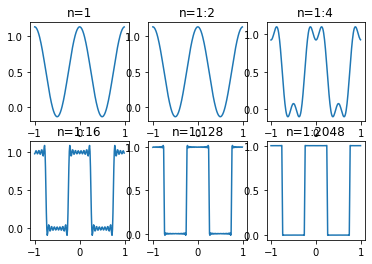

In [4]:
#Functions for each of the Fourier coefficients
def a0():
    return 1 #This is twice the average value of a(t)

def cn(n):
    return (1/(n*np.pi))*((np.sin(n*np.pi/2))-(np.sin(3*n*np.pi/2)))

def sn(n): #The value of this coefficient is 0 for even functions (like ours). cn is 0 for odd functions
    return 0#(1/(n*np.pi))*(-np.cos(n*np.pi/2)+1-np.cos(2*np.pi*n)+np.cos(3*n*np.pi/2))

#Function to get the Fourier series
def a(n, t):
    result = 0
    for i in range(n): #Performing a sum from 1 to n
        result += (cn(i+1)*np.cos((i+1)*2*np.pi*t) + sn(i+1)*np.sin((i+1)*2*np.pi*t))
    return a0()/2 + result



#Plotting the truncated series with the different n values
t2 = np.arange(-1, 1, 0.01)

fig2, plots = plt.subplots(2, 3)

plots[0, 0].plot(t2, a(1, t2))
plots[0, 0].set_title('n=1')
plots[0, 1].plot(t2, a(2, t2))
plots[0, 1].set_title('n=1:2')
plots[0, 2].plot(t2, a(4, t2))
plots[0, 2].set_title('n=1:4')
plots[1, 0].plot(t2, a(16, t2))
plots[1, 0].set_title('n=1:16')
plots[1, 1].plot(t2, a(128, t2))
plots[1, 1].set_title('n=1:128')
plots[1, 2].plot(t2, a(2048, t2))
plots[1, 2].set_title('n=1:2048')

plt.show()

#The larger n is, the more terms that are summed by a(n, t), and the closer the plot looks to
#the original function, a(t).